**2.4 PHÂN LOẠI VỚI KNN**

In [1]:
# Import

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Tải X và y từ các file CSV

X = pd.read_csv('D:/HUS_22001541/MachineLearning/Project/data/X_data.csv')
y = pd.read_csv('D:/HUS_22001541/MachineLearning/Project/data/y_data.csv').values.ravel() 

Thực hiện trên dữ liệu gốc

In [3]:
# Chia dữ liệu

X = X.to_numpy()

X_train_origin_41, X_test_origin_41, y_train_origin_41, y_test_origin_41 = train_test_split(X, y, test_size=0.2) #4:1
X_train_origin_73, X_test_origin_73, y_train_origin_73, y_test_origin_73 = train_test_split(X, y, test_size=0.3) #7:3
X_train_origin_64, X_test_origin_64, y_train_origin_64, y_test_origin_64 = train_test_split(X, y, test_size=0.4) #6:4

In [4]:
# Chuẩn hóa dữ liệu

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_origin_41 = scaler.fit_transform(X_train_origin_41)
X_test_origin_41 = scaler.fit_transform(X_test_origin_41)

X_train_origin_73 = scaler.fit_transform(X_train_origin_73)
X_test_origin_73 = scaler.fit_transform(X_test_origin_73)

X_train_origin_64 = scaler.fit_transform(X_train_origin_64)
X_test_origin_64 = scaler.fit_transform(X_test_origin_64)

[0.7826851758484309, 0.7826851758484309, 0.7343741947049399, 0.725840027786181, 0.6917302499635867, 0.6803569627911666]


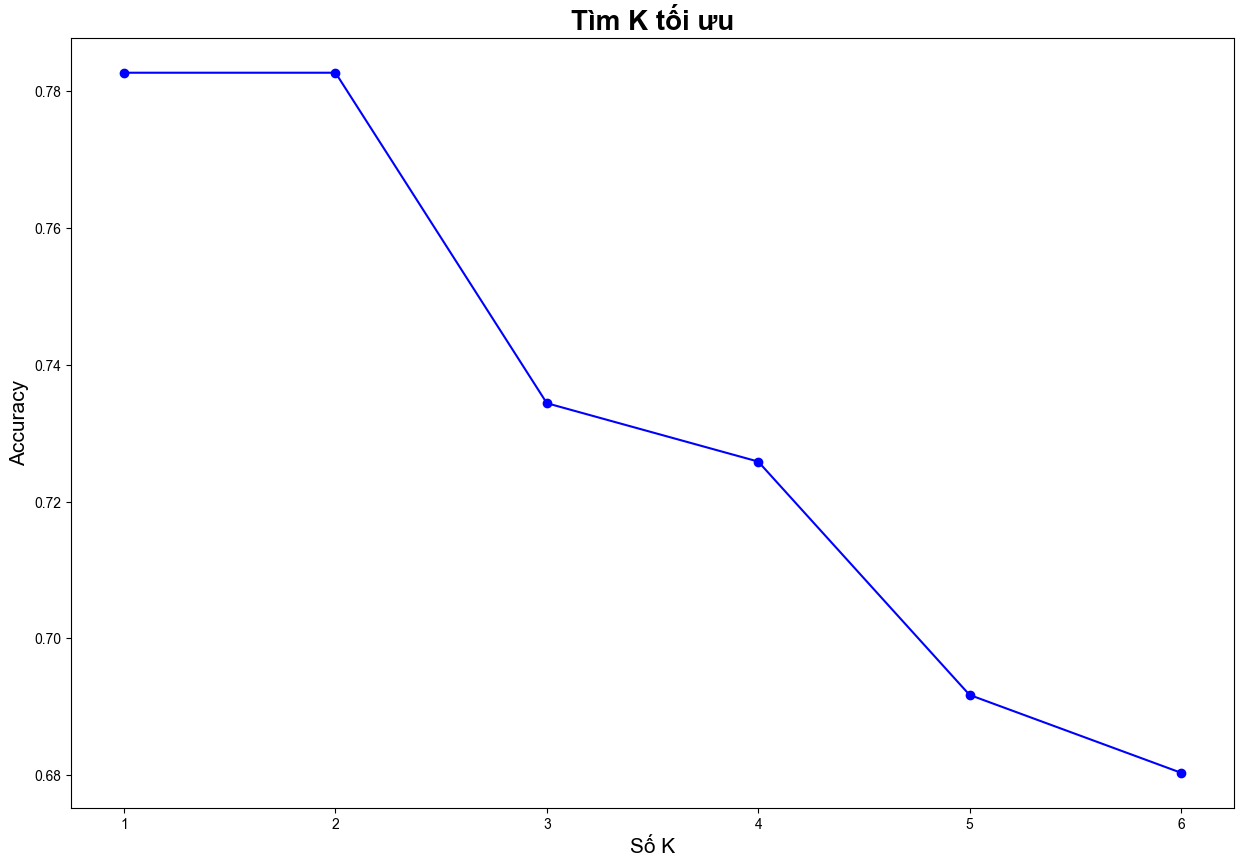

In [5]:
# Sử dụng phương pháp K-fold Cross-Validation để tìm ra K tối ưu

from KNN import KNN
from sklearn.model_selection import KFold

k_values = range(1, 7) 
kf = KFold(n_splits=5)  
mean_accuracies = []

for k in k_values:
    accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        my_clf = KNN(k=k)
        my_clf.fit(X_train, y_train)
        y_pred = my_clf.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    mean_accuracies.append(np.mean(accuracies))

best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print(mean_accuracies)

plt.figure(figsize=(15, 10))
plt.title('Tìm K tối ưu', fontsize=20, fontweight='bold')
plt.xlabel('Số K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b')

In [6]:
# Dùng model để test thử :)))

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train_origin_41, y_train_origin_41)
y_pred_origin_41_model = classifier.predict(X_test_origin_41)

classifier.fit(X_train_origin_73, y_train_origin_73)
y_pred_origin_73_model = classifier.predict(X_test_origin_73)

classifier.fit(X_train_origin_64, y_train_origin_64)
y_pred_origin_64_model = classifier.predict(X_test_origin_64)

In [7]:
print("4:1")
print(y_test_origin_41[40:50])
print(y_pred_origin_41_model[40:50])

print("\n7:3")
print(y_test_origin_73[40:50])
print(y_pred_origin_73_model[40:50])

print("\n6:4")
print(y_test_origin_64[40:50])
print(y_pred_origin_64_model[40:50])

4:1
[0 1 5 4 4 3 3 0 1 1]
[0 2 5 4 4 3 3 0 0 1]

7:3
[1 2 5 4 6 1 5 1 1 0]
[1 2 5 4 0 1 5 1 1 0]

6:4
[3 0 3 6 4 1 4 2 4 1]
[3 0 3 6 4 1 4 2 4 5]


In [8]:
# Dùng phương pháp KNN để phân loại trên 3 tập dữ liệu gốc đã được chia với tỷ lệ khác nhau

my_clf = KNN(k = 2)

my_clf.fit(X_train_origin_41, y_train_origin_41)
y_pred_origin_41 = my_clf.predict(X_test_origin_41)
print(f"4:1: \n{y_pred_origin_41[40:50]}")

my_clf.fit(X_train_origin_73, y_train_origin_73)
y_pred_origin_73 = my_clf.predict(X_test_origin_73)
print(f"7:3: \n{y_pred_origin_73[40:50]}")

my_clf.fit(X_train_origin_64, y_train_origin_64)
y_pred_origin_64 = my_clf.predict(X_test_origin_64)
print(f"6:4: \n{y_pred_origin_64[40:50]}")


4:1: 
[0, 5, 5, 4, 4, 3, 3, 0, 1, 1]
7:3: 
[1, 2, 1, 4, 0, 1, 5, 6, 1, 0]
6:4: 
[3, 0, 3, 6, 4, 0, 4, 2, 4, 6]


In [9]:
# Thực hiện kiểm tra Accuracy

acc_41 = np.sum(y_pred_origin_41 == y_test_origin_41) / len(y_test_origin_41)
acc_73 = np.sum(y_pred_origin_73 == y_test_origin_73) / len(y_test_origin_73)
acc_64 = np.sum(y_pred_origin_64 == y_test_origin_64) / len(y_test_origin_64)

print(f"acc_41: {acc_41}")
print(f"acc_73: {acc_73}")
print(f"acc_64: {acc_64}")

acc_41: 0.83451536643026
acc_73: 0.8470031545741324
acc_64: 0.834319526627219


Thực hiện trên dữ liệu đã giảm chiều

In [ ]:
# Giảm chiều dữ liệu
# Cần tìm hiểu cách PCA hoạt động như nào

from sklearn.decomposition import PCA

pca = PCA(n_components=6) 

X_train_pca_41 = pca.fit_transform(X_train_origin_41)
X_test_pca_41 = pca.fit_transform(X_test_origin_41)

X_train_pca_73 = pca.fit_transform(X_train_origin_73)
X_test_pca_73 = pca.fit_transform(X_test_origin_73)

X_train_pca_64 = pca.fit_transform(X_train_origin_64)
X_test_pca_64 = pca.fit_transform(X_test_origin_64)

In [11]:
my_clf.fit(X_train_pca_41, y_train_origin_41)
y_pred_pca_41 = my_clf.predict(X_test_pca_41)
print(f"4:1: \n{y_pred_pca_41[40:50]}")

my_clf.fit(X_train_pca_73, y_train_origin_73)
y_pred_pca_73 = my_clf.predict(X_test_pca_73)
print(f"7:3: \n{y_pred_pca_73[40:50]}")

my_clf.fit(X_train_pca_64, y_train_origin_64)
y_pred_pca_64 = my_clf.predict(X_test_pca_64)
print(f"6:4: \n{y_pred_pca_64[40:50]}")

4:1: 
[1, 1, 5, 4, 4, 3, 3, 0, 0, 1]
7:3: 
[6, 6, 2, 2, 0, 5, 5, 6, 5, 0]
6:4: 
[3, 0, 3, 5, 1, 1, 1, 1, 3, 2]


In [12]:
# Thực hiện kiểm tra Accuracy

acc_pca_41 = np.sum(y_pred_pca_41 == y_test_origin_41) / len(y_test_origin_41)
acc_pca_73 = np.sum(y_pred_pca_73 == y_test_origin_73) / len(y_test_origin_73)
acc_pca_64 = np.sum(y_pred_pca_64 == y_test_origin_64) / len(y_test_origin_64)

print(f"acc_41: {acc_pca_41}")
print(f"acc_73: {acc_pca_73}")
print(f"acc_64: {acc_pca_64}")

acc_41: 0.6193853427895981
acc_73: 0.4069400630914827
acc_64: 0.3301775147928994


In [ ]:
# Confusion Matrix

Trực quan hóa

In [ ]:
# Trực quan hóa và đánh giá với thực tế